In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 1. Generating data

In [3]:
x_train = np.array([
    [158, 1],
    [170, 1],
    [183, 1],
    [191, 1],
    [155, 0],
    [163, 0],
    [180, 0],
    [158, 0],
    [170, 0]
])
y_train = [64, 86, 84, 80, 49, 59, 67, 54, 67]

In [4]:
x_test = np.array([
    [168, 1],
    [180, 1],
    [160, 0],
    [169, 0]
])
y_test = [65, 96, 52, 67]

## 2. Data visualization

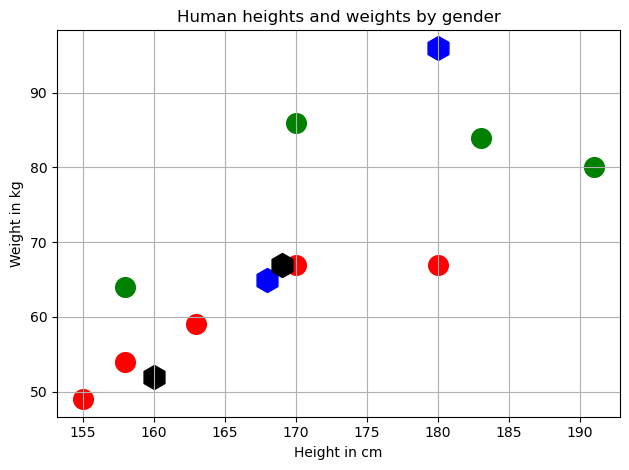

In [5]:
plt.figure()
plt.title('Human heights and weights by gender')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

for i, _ in enumerate(x_train):
    plt.scatter(x_train[:, 0][i], y_train[i], c='g' if x_train[:,1][i] == 1 else 'r', marker="o", s=200)

for i, _ in enumerate(x_test):
    plt.scatter(x_test[:, 0][i], y_test[i], c='b' if x_test[:,1][i] == 1 else 'k', marker="h", s=300)

plt.grid()
plt.tight_layout()

plt.savefig("./2-height-gender-weight-data.png")

## 3. kNN for a regression task

In [6]:
K = 3
clf = KNeighborsRegressor(n_neighbors=K)
clf.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [7]:
prediction = clf.predict(x_test)
print("Prediction weights: %s" % prediction)

Prediction weights: [70.66666667 79.         59.         70.66666667]


In [8]:
print("Coefficient of determination: %s" % r2_score(y_test, prediction))
print("Mean absolute error (MAE): %s" % mean_absolute_error(y_test, prediction))
print("Mean squared error (MAE): %s" % mean_squared_error(y_test, prediction))

Coefficient of determination: 0.6290565226735438
Mean absolute error (MAE): 8.333333333333336
Mean squared error (MAE): 95.8888888888889


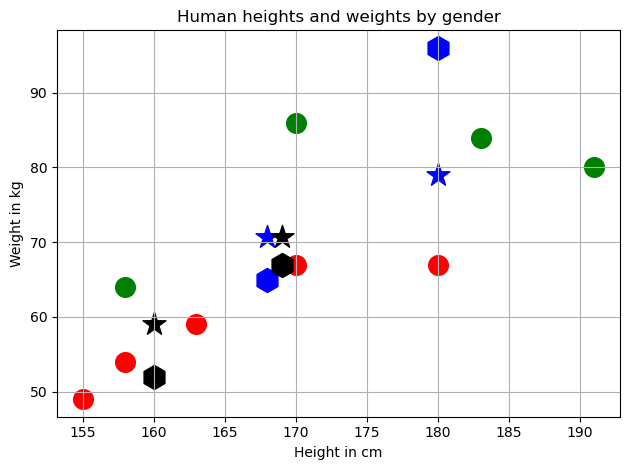

In [9]:
plt.figure()
plt.title('Human heights and weights by gender')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

for i, _ in enumerate(x_train):
    plt.scatter(x_train[:, 0][i], y_train[i], c='g' if x_train[:,1][i] == 1 else 'r', marker="o", s=200)

for i, _ in enumerate(x_test):
    plt.scatter(x_test[:, 0][i], y_test[i], c='b' if x_test[:,1][i] == 1 else 'k', marker="h", s=300)

for i, _ in enumerate(x_test):
    plt.scatter(x_test[:, 0][i], prediction[i], c='b' if x_test[:,1][i] == 1 else 'k', marker="*", s=300)

plt.grid()
plt.tight_layout()

plt.savefig("./2-height-gender-weight-regular-kNN.png")

## 4. Scaling features

### 4.1 Problems from heights in millimeter vs meter

In [10]:
from scipy.spatial.distance import euclidean

# heighht in millimeter
x_train = np.array([
    [1700, 1],
    [1600, 0]
])
x_test = np.array([1640, 1])

print(euclidean(x_train[0, :], x_test))
print(euclidean(x_train[1, :], x_test))

60.0
40.01249804748511


In [11]:
# heighht in meters
x_train = np.array([
    [1.7, 1],
    [1.6, 0]
])
x_test = np.array([164, 1])

print(euclidean(x_train[0, :], x_test))
print(euclidean(x_train[1, :], x_test))

162.3
162.40307878855006


### 4.2 StandardScaler in scikit-learn

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
ss = StandardScaler()

x_train = np.array([
    [158, 1],
    [170, 1],
    [183, 1],
    [191, 1],
    [155, 0],
    [163, 0],
    [180, 0],
    [158, 0],
    [170, 0]
])
x_train_scaled = ss.fit_transform(x_train)
print("x_train is\n", x_train)
print("x_train_scaled is\n", x_train_scaled)

x_test = np.array([
    [168, 1],
    [180, 1],
    [160, 0],
    [169, 0]
])
x_test_scaled = ss.fit_transform(x_test)

x_train is
 [[158   1]
 [170   1]
 [183   1]
 [191   1]
 [155   0]
 [163   0]
 [180   0]
 [158   0]
 [170   0]]
x_train_scaled is
 [[-0.9908706   1.11803399]
 [ 0.01869567  1.11803399]
 [ 1.11239246  1.11803399]
 [ 1.78543664  1.11803399]
 [-1.24326216 -0.89442719]
 [-0.57021798 -0.89442719]
 [ 0.86000089 -0.89442719]
 [-0.9908706  -0.89442719]
 [ 0.01869567 -0.89442719]]


In [14]:
clf.fit(x_train_scaled, y_train)
prediction_standard = clf.predict(x_test_scaled)
print("Prediction weights: %s" % prediction_standard)

Prediction weights: [78.         83.33333333 54.         64.33333333]


In [15]:
print("Coefficient of determination: %s" % r2_score(y_test, prediction_standard))
print("Mean absolute error (MAE): %s" % mean_absolute_error(y_test, prediction_standard))
print("Mean squared error (MAE): %s" % mean_squared_error(y_test, prediction_standard))

Coefficient of determination: 0.6706425961745109
Mean absolute error (MAE): 7.583333333333336
Mean squared error (MAE): 85.13888888888893


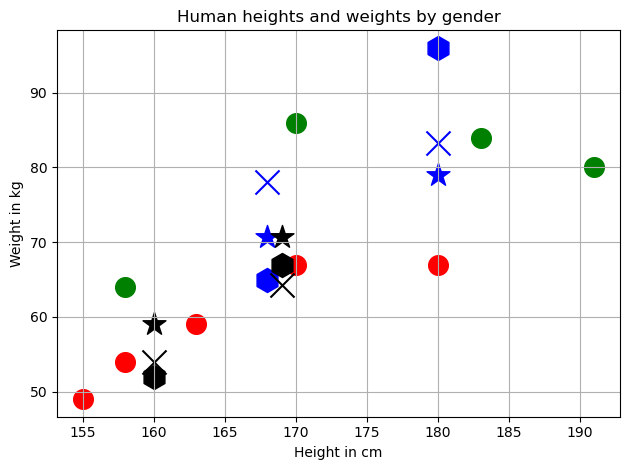

In [16]:
plt.figure()
plt.title('Human heights and weights by gender')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

for i, _ in enumerate(x_train):
    plt.scatter(x_train[:, 0][i], y_train[i], c='g' if x_train[:,1][i] == 1 else 'r', marker="o", s=200)

for i, _ in enumerate(x_test):
    plt.scatter(x_test[:, 0][i], y_test[i], c='b' if x_test[:,1][i] == 1 else 'k', marker="h", s=300)

for i, _ in enumerate(x_test):
    plt.scatter(x_test[:, 0][i], prediction[i], c='b' if x_test[:,1][i] == 1 else 'k', marker="*", s=300)

for i, _ in enumerate(x_test):
    plt.scatter(x_test[:, 0][i], prediction_standard[i], c='b' if x_test[:,1][i] == 1 else 'k', marker="x", s=300)

plt.grid()
plt.tight_layout()

plt.savefig("./2-height-gender-weight-regular-standard.png")